# Task#1 - Prediction using Supervised ML
**Predict the percentage of a student based on the number of study hours.**
## By Harleen Kaur

### *__Importing the required libraries__*

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

### *__Importing data__*

In [14]:
S_data = pd.read_csv('http://bit.ly/w-data')
S_data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### *__Getting basic information about the dataset__*

In [3]:
S_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
S_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### *__Visualizing Data Trends__*

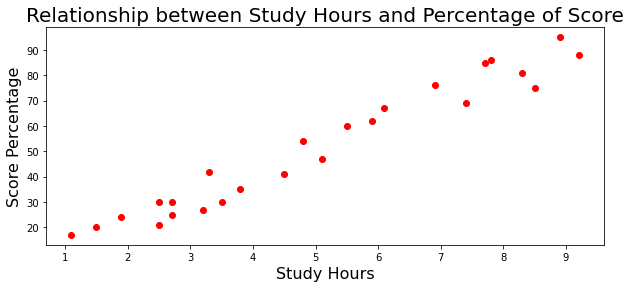

In [5]:
fig, ax = plt.subplots(figsize = (10,4))
ax.scatter( S_data['Hours'], S_data['Scores'], c='Red')
ax.set_xlabel('Study Hours', fontsize = 16)
ax.set_ylabel('Score Percentage', fontsize = 16)
ax.set_title('Relationship between Study Hours and Percentage of Score', fontsize = 20)
#ax.grid(True)
plt.show()


**Hence, we see a linear relationship between Study Hours and Score Percentage**

### *__Preparing the Data__* 

In [6]:
X = S_data.iloc[:, :-1].values
Y = S_data.iloc[:,1].values

**We split our data into training and test sets using Scikit-Learn's train_test_split() method**

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 0)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[20 27 69 30 62]


### *__Training the Data and Making Predictions__* 

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

Y_pred = regressor.predict(X_test)
print(Y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [9]:
print(regressor.intercept_)
print('coefficient:', regressor.coef_)
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) -  Y_test) ** 2))

2.018160041434669
coefficient: [9.91065648]
Mean squared error: 21.60


### *__Comparing Actual Data and Predicted data__* 

In [10]:
df = pd.DataFrame({ 'Actual': Y_test, 'Predicted' : Y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


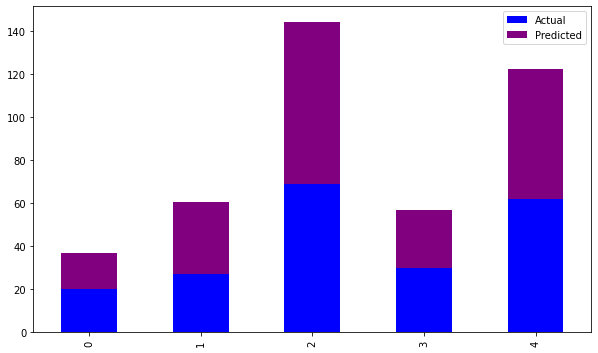

In [11]:
ax = df.plot.bar(stacked= True, color = ['blue', 'purple'], figsize =(10,6))


### *__Predicting the score for 9.25 hours of study__*

In [12]:
regressor.intercept_+regressor.coef_*9.25

array([93.69173249])

 ### *__Conclusion__*


**Hence, on the basis of our model we can say that, a student who studies for _9.25_ hours per day will score approximately _93.6%_**

### *__Thankyou__*